# Input Data

In [4]:
import pandas as pd
data = pd.read_csv("restaurant_menu_optimization_data.csv")
data.head()

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium


# Cek Missing Value

In [5]:
data.isna().sum()

RestaurantID     0
MenuCategory     0
MenuItem         0
Ingredients      0
Price            0
Profitability    0
dtype: int64

# Exploritary Data Analyze (EDA)

In [6]:
data.describe()

,Price
count,1000.00000
mean,12.81801
std,7.41713
min,2.01000
25%,4.86750
50%,12.53500
75%,17.69000
max,29.84000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RestaurantID   1000 non-null   object 
 1   MenuCategory   1000 non-null   object 
 2   MenuItem       1000 non-null   object 
 3   Ingredients    1000 non-null   object 
 4   Price          1000 non-null   float64
 5   Profitability  1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


# Visualization

In [ ]:
!pip install seaborn matplotlib

<Axes: title={'center': 'Price'}, xlabel='MenuCategory'>

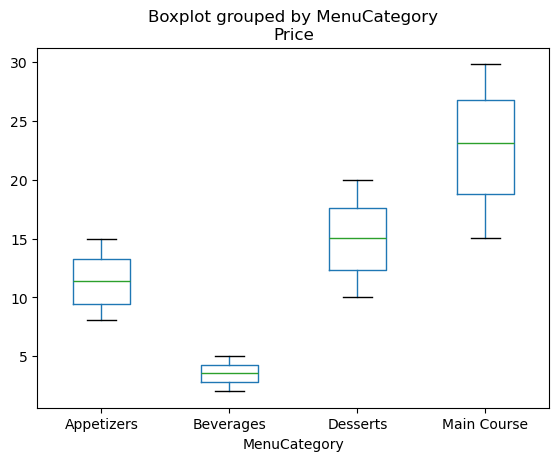

In [25]:
# BOXPLOT #
import matplotlib.pyplot as plt
import seaborn as sns
data.boxplot(column='Price', by='MenuCategory', grid=False)

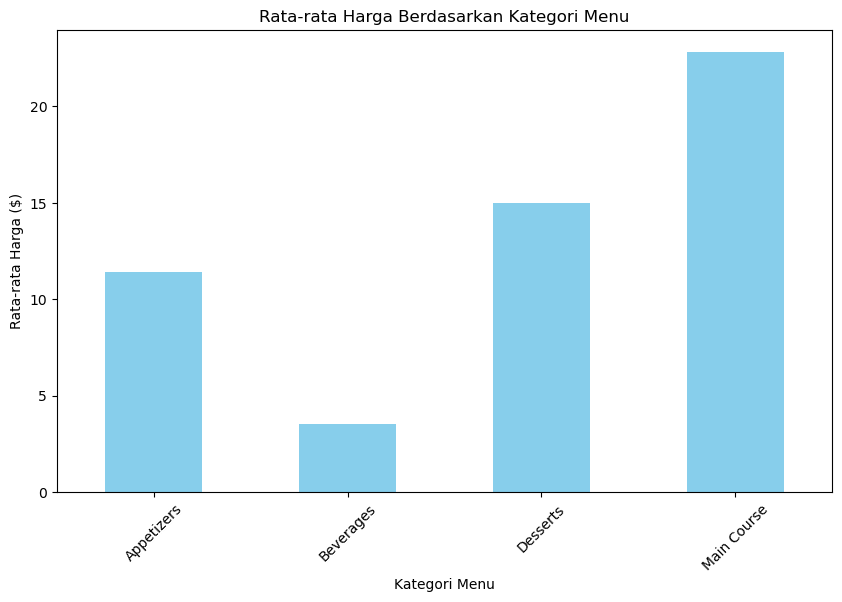

In [20]:
# BARPLOT #
average_prices = data.groupby('MenuCategory')['Price'].mean()
plt.figure(figsize=(10, 6))
average_prices.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Harga Berdasarkan Kategori Menu')
plt.xlabel('Kategori Menu')
plt.ylabel('Rata-rata Harga ($)')
plt.xticks(rotation=45)
plt.show()

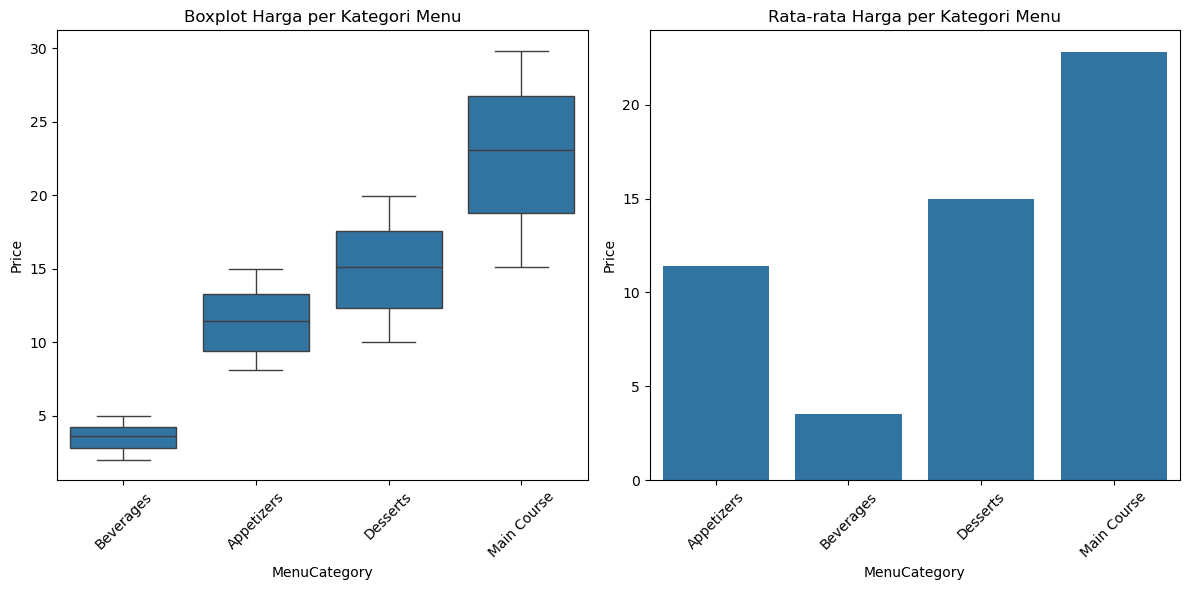

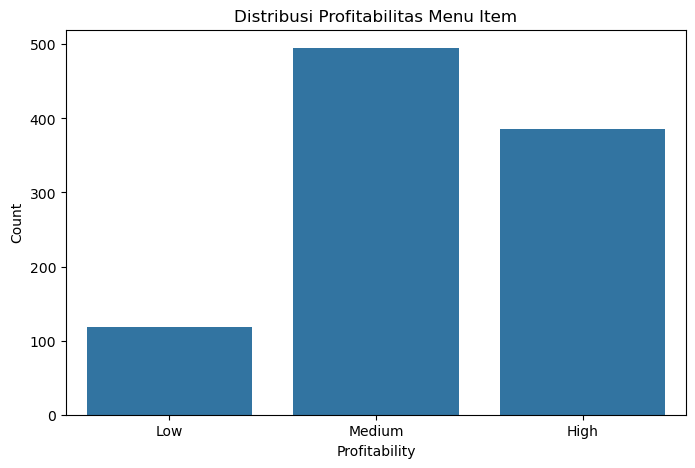

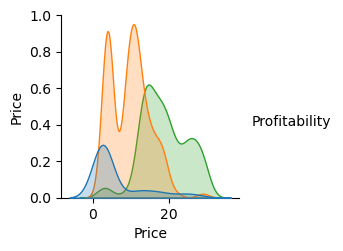

In [28]:
# Visualisasi
plt.figure(figsize=(12, 6))

# Boxplot Harga per Kategori Menu
plt.subplot(1, 2, 1)
sns.boxplot(x='MenuCategory', y='Price', data=data)
plt.title('Boxplot Harga per Kategori Menu')
plt.xticks(rotation=45)

# Barplot Rata-rata Harga per Kategori Menu
plt.subplot(1, 2, 2)
average_prices = data.groupby('MenuCategory')['Price'].mean().reset_index()
sns.barplot(x='MenuCategory', y='Price', data=average_prices)
plt.title('Rata-rata Harga per Kategori Menu')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Distribusi Profitabilitas
plt.figure(figsize=(8, 5))
sns.countplot(x='Profitability', data=data)
plt.title('Distribusi Profitabilitas Menu Item')
plt.xlabel('Profitability')
plt.ylabel('Count')
plt.show()

# Pairplot untuk melihat hubungan antar variabel
sns.pairplot(data, hue='Profitability')
plt.show()

# Data Preprocessing

In [30]:
# Cek Missing Value
data.isnull().sum()

RestaurantID     0
MenuCategory     0
MenuItem         0
Ingredients      0
Price            0
Profitability    0
dtype: int64

In [48]:
from sklearn.preprocessing import LabelEncoder
df = pd.DataFrame(data)
df

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium
...,...,...,...,...,...,...
995,R003,Beverages,Soda,['confidential'],2.16,Low
996,R001,Appetizers,Caprese Salad,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.86,Medium
997,R003,Main Course,Vegetable Stir-Fry,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",20.57,High
998,R002,Desserts,Tiramisu,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.80,High


In [52]:
# One Hot Encoder
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    [("Profitability", OneHotEncoder(), ["Profitability"]),
    ("MenuCategory", OneHotEncoder(), ["MenuCategory"])],
    remainder = 'passthrough'
)
ct


ColumnTransformer(remainder='passthrough',
                  transformers=[('Profitability', OneHotEncoder(),
                                 ['Profitability']),
                                ('MenuCategory', OneHotEncoder(),
                                 ['MenuCategory'])])

In [53]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print(df_scaled)


ValueError: could not convert string to float: 'R003'